##**Name - Nehal Gupta**
##**Data Science Intern @LGM**
##**TASK - 01**
##**Project : Iris Flower Classification ML Project**

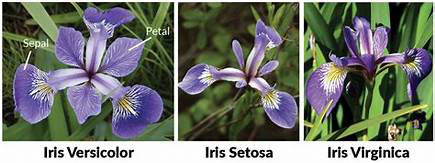

In [2]:
from PIL import Image 
img = Image.open('IRIS.jpg')
img

###**Loading some libraries**

In [72]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [73]:
# Reading the dataset
df = pd.read_csv('IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [74]:
#Displaying the upper most rows of the dataset
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [75]:
df.shape

(150, 5)

In [76]:
df.columns.values

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'], dtype=object)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [78]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [79]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [80]:
df.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

In [81]:
df.groupby("species").size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [82]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


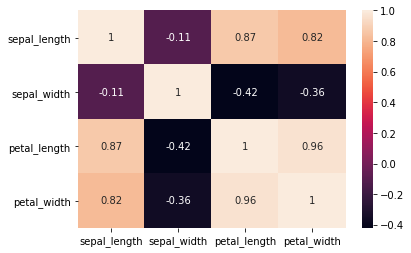

In [85]:
sns.heatmap(df.corr(),annot = True)

#**Visualization**

###**Histogram** 

Text(0.5, 1.0, 'petal_length')

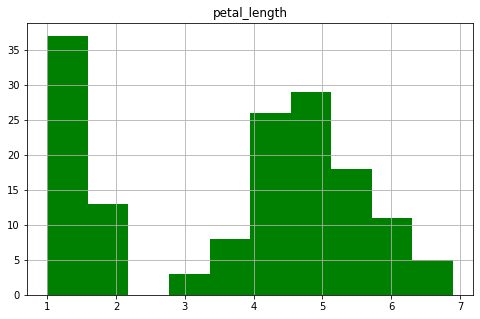

In [87]:
df['petal_length'].hist(color = 'green',figsize = (8,5))
plt.title('petal_length')

Text(0.5, 1.0, 'petal_width')

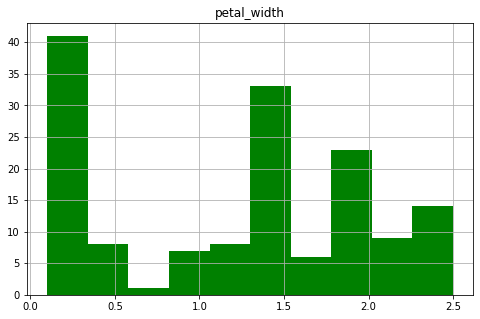

In [88]:
df['petal_width'].hist(color = 'green',figsize = (8,5))
plt.title('petal_width')

Text(0.5, 1.0, 'sepal_length')

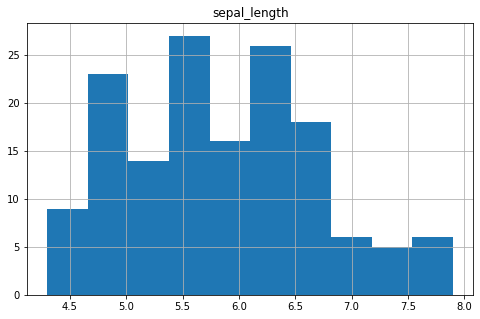

In [89]:
df['sepal_length'].hist(figsize = (8,5))
plt.title('sepal_length')

Text(0.5, 1.0, 'sepal_width')

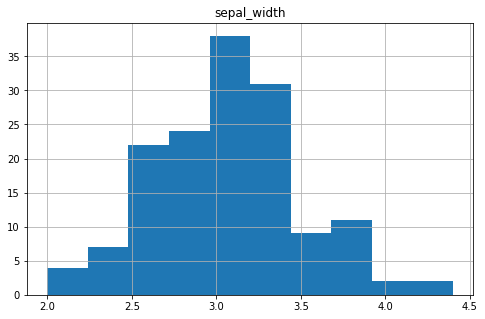

In [90]:
df['sepal_width'].hist(figsize = (8,5))
plt.title('sepal_width')

##Scatter plot

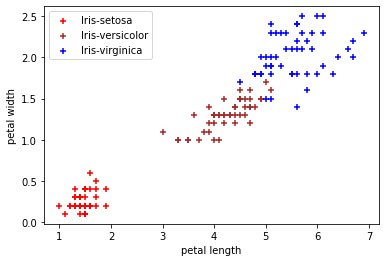

In [91]:
colors = ['red','brown','blue']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'],x['petal_width'], c = colors[i], label=species[i],marker = '+')
    plt.xlabel("petal length")
    plt.ylabel("petal width")
    plt.legend()


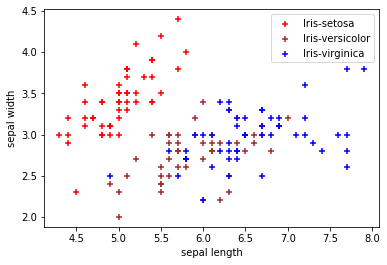

In [46]:

for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'], c = colors[i], label=species[i],marker = '+')
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()

##**Label Encoder**

In [47]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [48]:
df['sepcies'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepcies
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


##**Splitting the data as Train and Test datasets**

In [92]:
#Model Training
#train - 80
#test - 20
from sklearn.model_selection import train_test_split

x = df.drop(columns = ['species'])
y = df['species']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

##**Logistic Regression**

In [93]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
#print setric to get performance
print('Accuracy :',model.score(x_test,y_test)*100)

Accuracy : 100.0


###**knn - k_nearest neighbors**

In [94]:
#knn - k_nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 5)

In [95]:
#model training
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [96]:
#print setric to get performance
print('Accuracy :',model.score(x_train,y_train)*100)

Accuracy : 96.66666666666667


###**Decision Tree**

In [98]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [99]:
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [100]:
#print setric to get performance
print('Accuracy :',model.score(x_train,y_train)*100)

Accuracy : 100.0


##**Boxplot**

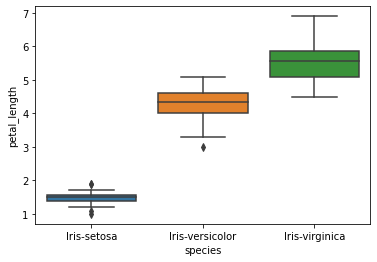

In [101]:
sns.boxplot(x = 'species', y = 'petal_length', data = df)

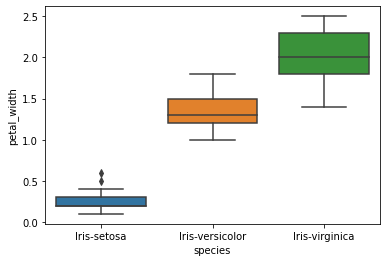

In [102]:
sns.boxplot(x = 'species', y = 'petal_width', data = df)

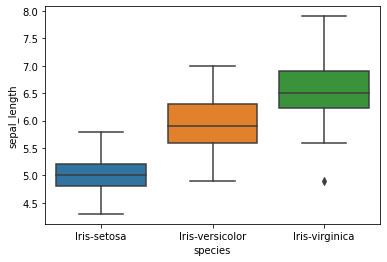

In [103]:
sns.boxplot(x = 'species', y = 'sepal_length', data = df)

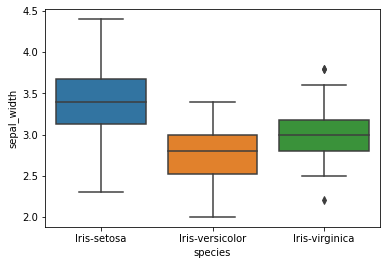

In [104]:
sns.boxplot(x = 'species', y = 'sepal_width', data = df)

##**Pair-plot**

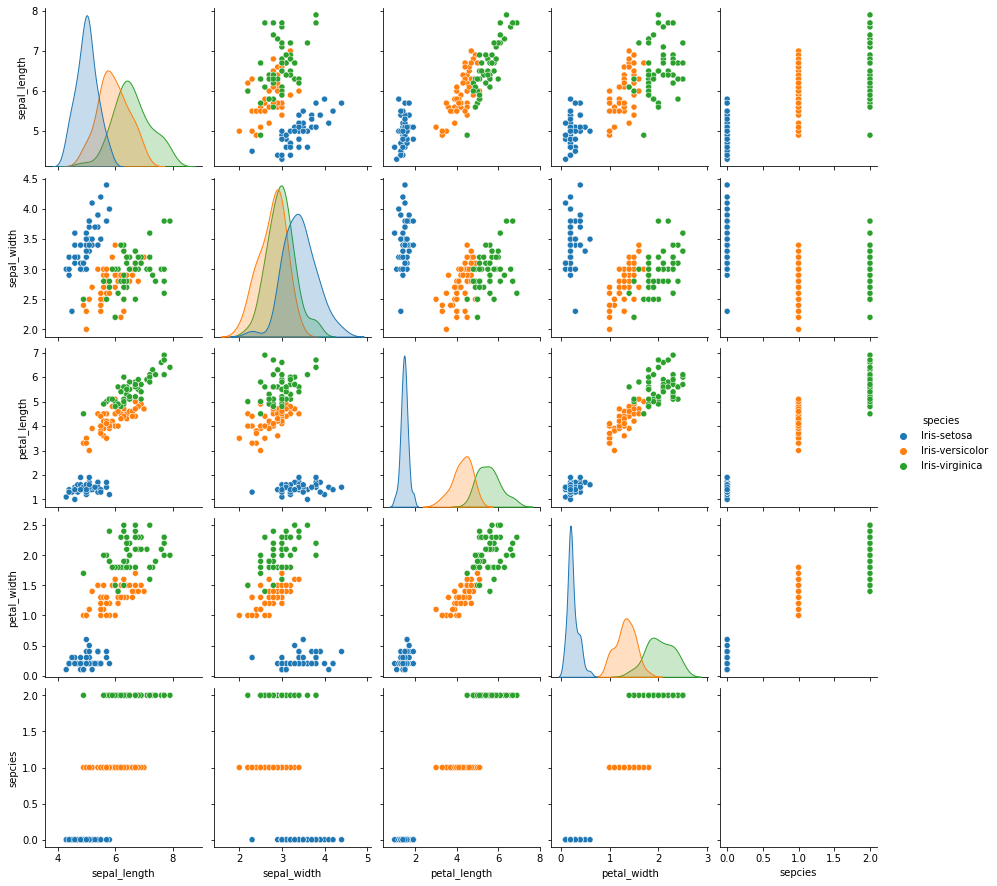

In [71]:
# A pairplot plot pairwise relationship in dataset
sns.pairplot(df,hue = 'species')